In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [71]:
sns.set_style('darkgrid', {"axes.edgecolor": ".15", "grid.color": ".15"})
sns.set_palette('Blues_d')

## Lets take a look at some of our data

In [37]:
df = pd.read_csv('hotel_bookings.csv')
print("Quick look at the start of our data")
print(df.head(5))
print("Number of values in each col")
for col in df.columns:
    print(col + ":" + str(df[col].count()))
print("Number of Viable Values in each col")
for col in df.columns:
    print(df[col].isna().count())

Quick look at the start of our data
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0 

### It looks like all of our data doesn't have any Nan values. Let's look at some graphs.

### Let's first take a look at the number of days a reservation takes based on the number of adults, children, or babies are in a group.

<AxesSubplot:xlabel='adults', ylabel='days_in_waiting_list'>

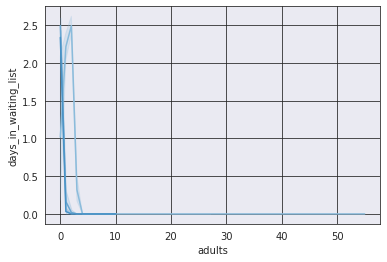

In [44]:
sns.lineplot(y='days_in_waiting_list', x='adults', data=df)
sns.lineplot(y='days_in_waiting_list', x='children', data=df)
sns.lineplot(y='days_in_waiting_list', x='babies', data=df)

## Looks like we may have some large values that are skewing our graphs.

In [56]:
print(f'Number of values in our Adults col:\n{df["adults"].value_counts()}\n')
print(f'Number of values in our Childrens col:\n{df["children"].value_counts()}\n')
print(f'Number of values in our Babies col:\n{df["babies"].value_counts()}\n')

Number of values in our Adults col:
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64

Number of values in our Childrens col:
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Number of values in our Babies col:
0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64



## We have some values that are very high in our ranges.  These are outliers and will definitely skew our data. Lets remove these and replot our data.

In [80]:
df_drop_family_outliers = df[(df['adults'] <6) & (df['children'] < 10) & (df['babies'] < 9)]
print(f'Number of values in our Adults col:\n{df_drop_family_outliers["adults"].value_counts()}\n')
print(f'Number of values in our Childrens col:\n{df_drop_family_outliers["children"].value_counts()}\n')
print(f'Number of values in our Babies col:\n{df_drop_family_outliers["babies"].value_counts()}\n')

Number of values in our Adults col:
2    89675
1    23026
3     6201
0      403
4       62
5        2
Name: adults, dtype: int64

Number of values in our Childrens col:
0.0    110780
1.0      4861
2.0      3652
3.0        76
Name: children, dtype: int64

Number of values in our Babies col:
0    118454
1       900
2        15
Name: babies, dtype: int64



<AxesSubplot:xlabel='adults', ylabel='days_in_waiting_list'>

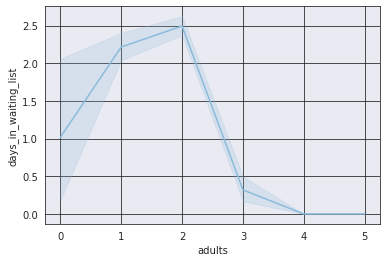

In [78]:
sns.lineplot(y='days_in_waiting_list', x='adults', data=df_drop_family_outliers)

<AxesSubplot:xlabel='children', ylabel='days_in_waiting_list'>

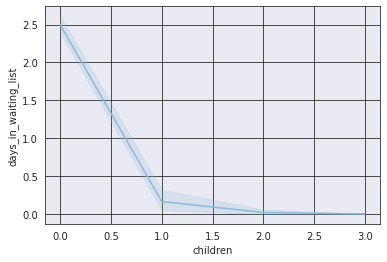

In [77]:
sns.lineplot(y='days_in_waiting_list', x='children', data=df_drop_family_outliers)

<AxesSubplot:xlabel='babies', ylabel='days_in_waiting_list'>

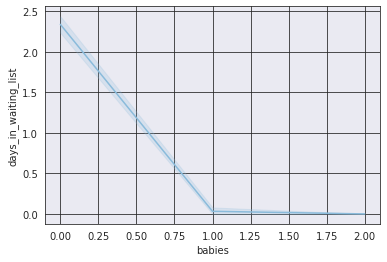

In [76]:
sns.lineplot(y='days_in_waiting_list', x='babies', data=df_drop_family_outliers)

### As we can see there is an obvious correlation to the wait time for 2 adults at this is the most popular number of adults in a family

### Let's take a look at how our variables relate to the average daily rate notated as (adr) in our data

0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: adults, Length: 119390, dtype: int64


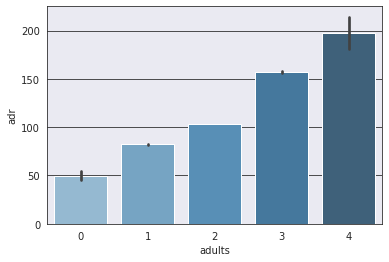

In [144]:
df_filtered_adult = df[df['adults'] < 5]

sns.barplot(x='adults', y='adr', data=df_filtered_adult)
print(df['adults'])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64


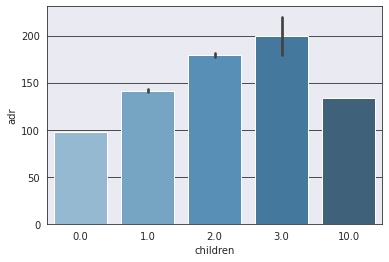

In [142]:
sns.barplot(x='children', y='adr', data=df)
print(df['children'])

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: babies, Length: 119390, dtype: int64


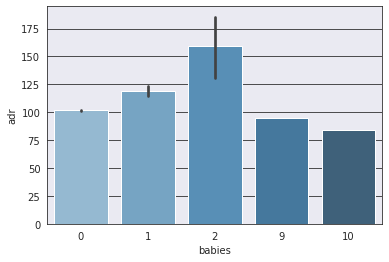

In [143]:
sns.barplot(x='babies', y='adr', data=df)
print(df['babies'])